<a href="https://colab.research.google.com/github/andy1899/Machine-Learning-Lab-Acropolis-CS-1/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import keras

from keras.utils import plot_model
#plot_model(model, to_file='model.png')

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing import image
from keras.applications.mobilenet import MobileNet
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.models import Model
import timeit

import warnings
warnings.filterwarnings('ignore')

In [14]:
batch_size = 512
num_classes = 10
epochs = 20

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [20]:
model = Sequential()
model.add(Conv2D(10, kernel_size=(6, 6), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
#keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)
#keras.layers.AveragePooling1D(pool_size=2, strides=None, padding='valid', data_format='channels_last')

model.add(Conv2D(16, (7, 7), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)
#keras.layers.AveragePooling1D(pool_size=2, strides=None, padding='valid', data_format='channels_last')

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 23, 23, 10)        370       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 11, 11, 10)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 5, 5, 16)          7856      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 2, 2, 16)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 2, 2, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)               

In [21]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 37us/step - loss: 1.1246 - acc: 0.6227 - val_loss: 0.2580 - val_acc: 0.9253
Epoch 2/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.4360 - acc: 0.8661 - val_loss: 0.2320 - val_acc: 0.9286
Epoch 3/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.3050 - acc: 0.9092 - val_loss: 0.1209 - val_acc: 0.9626
Epoch 4/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.2451 - acc: 0.9284 - val_loss: 0.1042 - val_acc: 0.9686
Epoch 5/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.2114 - acc: 0.9392 - val_loss: 0.0942 - val_acc: 0.9707
Epoch 6/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.1859 - acc: 0.9477 - val_loss: 0.0751 - val_acc: 0.9775
Epoch 7/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.1705 - acc: 0.9508 - val_loss: 0.0801 - val_acc

In [22]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04527790461744153
Test accuracy: 0.9867


In [0]:
model.save("CNN.h5")

Train on 45000 samples, validate on 15000 samples
Epoch 1/10
45000/45000 [==============================] - 21s 474us/step - loss: 0.1186 - acc: 0.9670 - val_loss: 0.0596 - val_acc: 0.9821
Epoch 2/10
45000/45000 [==============================] - 21s 470us/step - loss: 0.1109 - acc: 0.9697 - val_loss: 0.0656 - val_acc: 0.9822
Epoch 3/10
45000/45000 [==============================] - 21s 466us/step - loss: 0.1115 - acc: 0.9704 - val_loss: 0.0604 - val_acc: 0.9837
Epoch 4/10
45000/45000 [==============================] - 21s 464us/step - loss: 0.1061 - acc: 0.9713 - val_loss: 0.0639 - val_acc: 0.9822
Epoch 5/10
45000/45000 [==============================] - 21s 461us/step - loss: 0.1048 - acc: 0.9718 - val_loss: 0.0749 - val_acc: 0.9814
Epoch 6/10
45000/45000 [==============================] - 21s 462us/step - loss: 0.1054 - acc: 0.9726 - val_loss: 0.0859 - val_acc: 0.9803
Epoch 7/10
45000/45000 [==============================] - 21s 462us/step - loss: 0.1078 - acc: 0.9724 - val_loss: 0.

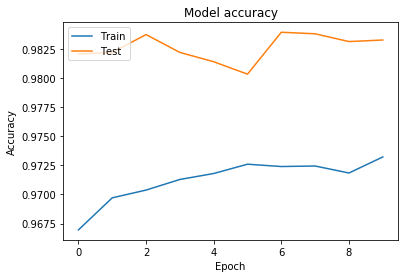

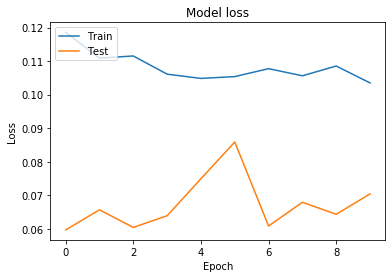

In [24]:
plot_model(model)

import matplotlib.pyplot as plt

history = model.fit(x_train, y_train, validation_split=0.25, epochs=10, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
